> # <b>Data Diri</b>
  - Nama : Achmad Afandy
  - Email : achmadafandy74@gmail.com



In [30]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping 
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from google.colab import files
import time
import numpy as np
%matplotlib inline
import os,glob
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 



In [9]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-11-09 13:00:15--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  32.3MB/s    in 10s     

2020-11-09 13:00:26 (30.2 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [10]:
# ekstraksi zipfile
import zipfile, os, urllib
local_zipfile = '/tmp/rockpaperscissors.zip'
zip_readfile = zipfile.ZipFile(local_zipfile, 'r')
zip_readfile.extractall('/tmp')
zip_readfile.close()

In [11]:
os.listdir('/tmp/rockpaperscissors/')

['scissors', 'rock', 'README_rpc-cv-images.txt', 'paper', 'rps-cv-images']

In [12]:
fileObject = open('/tmp/rockpaperscissors/README_rpc-cv-images.txt', "r")
data = fileObject.read()
print(data)

AUTHOR: Julien de la Bruère-Terreault (drgfreeman@tuta.io)

LICENSE: CC-BY-SA 4.0

DESCRIPTION: This dataset contains images of hand gestures from the Rock-Paper-Scissors game. The images were captured as part of a hobby project where I developped a Rock-Paper-Scissors game using computer vision and machine learning on the Raspberry Pi (https://github.com/DrGFreeman/rps-cv)

CONTENTS: The dataset contains a total of 2188 images corresponding to the 'Rock' (726 images), 'Paper' (710 images) and 'Scissors' (752 images) hand gestures of the Rock-Paper-Scissors game. All image are taken on a green background with relatively consistent ligithing and white balance.

FORMAT: All images are RGB images of 300 pixels wide by 200 pixels high in .png format. The images are separated in three sub-folders named 'rock', 'paper' and 'scissors' according to their respective class.




In [13]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images/rock')

['545XFudcV0UlnH2Y.png',
 'BsWasfK2PdoRNEDw.png',
 'KKYleXVUgi0h0np4.png',
 'poJARbX3gvvFDPXQ.png',
 'O0YV4V0z2pe4kxwx.png',
 'OavUnCwAEACzIK0A.png',
 'qYTvWILCYIauIMkW.png',
 'MReo7XBz7dmQ5HdE.png',
 'FPa2M1e589cxIyfR.png',
 'NpJEIrbBZBhud8tg.png',
 'LF4yf48q3qRLLZNS.png',
 'FF2mNwRujDxzozUQ.png',
 'NzQfD5IzPphBZNKi.png',
 'wcL0C9QgqDYxaj3W.png',
 '3MSy75FXVzhhLg77.png',
 'Zyzp7nBCojgQeCZs.png',
 '5SeLlZliRJtZAnIZ.png',
 'YmNXS0VhjQjldK3P.png',
 'tMiH4tj8YffHNl0O.png',
 'BTcHjuerLAYWzx8S.png',
 'WRIlJop0nm7zZfg3.png',
 'l0rOvSD1UwFg1Xv2.png',
 'No7Qf3DONPRwor5U.png',
 'lcZcrpCoDl7Y1AUF.png',
 '1MOm36DHK0R8OfIC.png',
 'QdUOXLvrrFZbV5G6.png',
 'OCa85cn2JdZzOe8c.png',
 'JOaPrPIINVvoI9l4.png',
 'vL6UMd1OOIGuEdFu.png',
 'yQIWMi6PpMKRMZaa.png',
 'qUjyvBdP04lUmBkl.png',
 '8vkvSVmLwxY1SH3p.png',
 '9TeUwuSOgtGgewNL.png',
 'hMqKoUYAvB91YRuO.png',
 'QM8un28uGzplAkrb.png',
 'sKD8rWd2xMuZQl49.png',
 '3k7WrSAInCaatFtl.png',
 '2O9XPBJRT119drWX.png',
 'Jg78GVOKbbyQchWq.png',
 'zrrYLvM2uywyFwRy.png',


In [14]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['scissors', 'rock', 'README_rpc-cv-images.txt', 'paper']

(200, 300, 3)


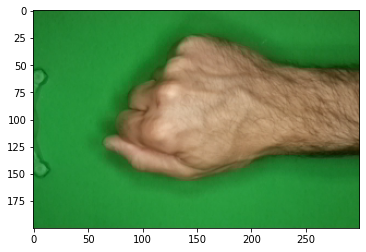

In [15]:
# tes menampilkan gambar dengan merubah ke bentuk numpy

folder_path = '/tmp/rockpaperscissors/rps-cv-images/rock'
for filename in glob.glob(os.path.join(folder_path, '*.png')):
  with open(filename, 'r') as f:
    img = mpimg.imread(filename) 
    print(img.shape) # dimensi image 
# Output Images 
    plt.imshow(img)
    break # tes 1 gambar aja

In [16]:
# split train tes langsung menggunakan ImageDataGenator agar tidak perlu membuat folder sendiri

data_path = '/tmp/rockpaperscissors/rps-cv-images'
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range = 20,
    validation_split=0.4) # set validation split 40%

train_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(150, 150),
    batch_size=32, # pake default
    class_mode='categorical', # karena ada 3 class
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    data_path, # same directory as training data
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical', # karena ada 3 class
    subset='validation') # set as validation data



Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


> # <b> Design CNN Model </b>

In [17]:
# Designing the layers
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (4,4), activation = 'selu', input_shape= (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation=  'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'selu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (2,2), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (2,2), activation = 'selu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax') # use softmax instead sigmoid, karena multiclass (3 class)
])

# Compile model dengan 'adam' dengan tuning hyperparameter
model.compile(optimizer = tf.optimizers.Adam( learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, amsgrad=True), 
                  loss = 'categorical_crossentropy', # pake categorical karana ada 3 class
                  metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 147, 147, 16)      784       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 73, 73, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 71, 71, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 33, 33, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 15, 15, 128)      

> # <b>Membuat Callback Function</b>
  - ReduceLROnPlateau
  - ModelCheckpoint
  - EarlyStopping

In [27]:
# Create Collback EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

filepath="/tmp/rockpaperscissors/checkpoint"



checkpoint = ModelCheckpoint(filepath,
                             monitor='accuracy',
                             mode='max',
                             save_best_only=True,
                             save_weights_only = True,
                             verbose=1)


EarlyStop = EarlyStopping(monitor = 'accuracy',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)



Reduce = ReduceLROnPlateau(monitor='accuracy', 
                           factor=0.999, 
                           patience=10, 
                           verbose=0, 
                           mode='max',
                           min_delta=0.0001, 
                           cooldown=0, 
                           min_lr=0, 
)

> # <b>Proses Training Model</b>

In [28]:
# Training Modelnya
mulai = time.time()


trained_model = model.fit(train_generator,
                              steps_per_epoch = 25, 
                              epochs = 30, 
                              verbose = True, 
                              validation_data = validation_generator,
                              callbacks = [checkpoint, EarlyStop, Reduce])

# Calculating training time
stop = time.time()
menit = int(np.floor((stop-mulai)/60));
detik = int(np.ceil((stop-mulai)-menit*60));
print(f'waktu training = {menit} menit {detik} detik')

Epoch 1/30
25/25 [==============================] - ETA: 0s - loss: 0.1721 - accuracy: 0.9450
Epoch 00001: accuracy improved from -inf to 0.94500, saving model to /tmp/rockpaperscissors/checkpoint
25/25 [==============================] - 10s 419ms/step - loss: 0.1721 - accuracy: 0.9450 - val_loss: 0.1815 - val_accuracy: 0.9497
Epoch 2/30
25/25 [==============================] - ETA: 0s - loss: 0.1178 - accuracy: 0.9571
Epoch 00002: accuracy improved from 0.94500 to 0.95714, saving model to /tmp/rockpaperscissors/checkpoint
25/25 [==============================] - 10s 409ms/step - loss: 0.1178 - accuracy: 0.9571 - val_loss: 0.1459 - val_accuracy: 0.9519
Epoch 3/30
25/25 [==============================] - ETA: 0s - loss: 0.1282 - accuracy: 0.9571
Epoch 00003: accuracy did not improve from 0.95714
25/25 [==============================] - 10s 411ms/step - loss: 0.1282 - accuracy: 0.9571 - val_loss: 0.2167 - val_accuracy: 0.9359
Epoch 4/30
25/25 [==============================] - ETA: 0s - 

> # <b>Reporting Hasil Training dan Visualisasi

In [36]:
trained_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

Text(0, 0.5, 'Accuracy')

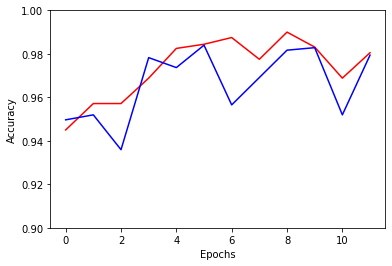

In [46]:
plt.plot(trained_model.history['accuracy'],'red')
plt.plot(trained_model.history['val_accuracy'],'blue')
plt.yticks([0.9,0.92, 0.94, 0.96, 0.98, 1])
plt.xlabel("Epochs")
plt.ylabel('Accuracy')

> Model terbaik berhenti pada Epoch 12, dengan :
  - accuracy = 98,05 %
  - val_accuracy = 97,94 %

Dengan waktu training =  2 menit 7 detik

> # <b>Testing


Saving paper_tes.png to paper_tes.png
paper_tes.png


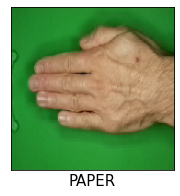

In [32]:
uploaded_image = files.upload()

for file_name in uploaded_image.keys():
    IMG_FILE = image.load_img(file_name, target_size = (150,150))
    
    fig = plt.figure(figsize = (3,3))
    x = image.img_to_array(IMG_FILE)
    x = np.expand_dims(x, axis = 0)

    images = np.vstack([x])/255
    classes = model.predict(images)

    print(file_name)
    if np.argmax(classes[0]) == 0:
        label = "PAPER"
    elif np.argmax(classes[0]) == 1:
        label = "ROCK"
    else:
        label = "SCISSOR"

    plt.imshow(IMG_FILE)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(label, fontsize = 15)